In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

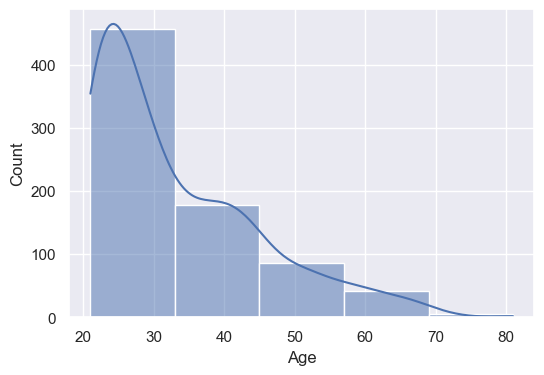

In [16]:

plt.figure(figsize=(6,4))

sns.set_theme(style = 'darkgrid')

sns.histplot(data = df, x = 'Age', bins= 5, kde=True)  

plt.show()


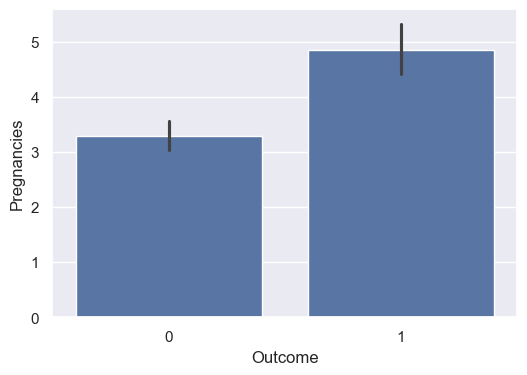

In [19]:
plt.figure(figsize=(6,4))

sns.set_theme(style = 'darkgrid')

sns.barplot(data = df, x = 'Outcome', y='Pregnancies')  

plt.show()


<Axes: xlabel='Insulin'>

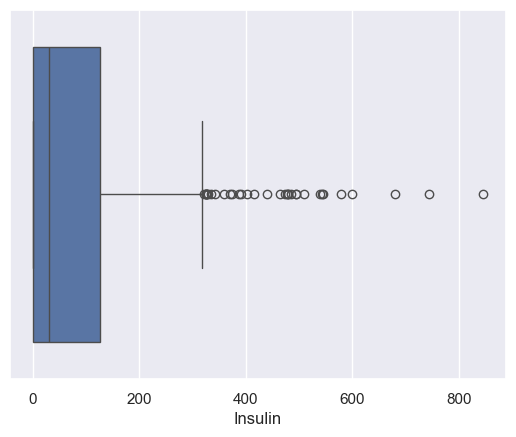

In [29]:
sns.boxplot(x=df['Insulin'])

In [34]:
mn_Q1 = np.percentile(df['Insulin'],25)

mn_Q3 = np.percentile(df['Insulin'],75)


mn_IQR = mn_Q3-mn_Q1
mn_lower_range = mn_Q1 - (1.5*mn_IQR)
mn_upper_range = mn_Q3 + (1.5*mn_IQR)

print(mn_IQR)
print(mn_lower_range)
print(mn_upper_range)

127.25
-190.875
318.125


In [35]:
df = df[(df['Insulin'] > mn_lower_range) & (df['Insulin'] < mn_upper_range)]
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,3.841962,119.182561,68.990463,19.985014,62.328338,31.854087,0.466918,33.185286,0.339237
std,3.383143,31.266437,19.613487,15.951788,79.132557,7.919395,0.322066,11.714824,0.473773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.243250,24.000000,0.000000
50%,3.000000,115.000000,72.000000,22.000000,0.000000,32.000000,0.368000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,115.000000,36.400000,0.613750,40.750000,1.000000
max,17.000000,199.000000,122.000000,99.000000,318.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Insulin'>

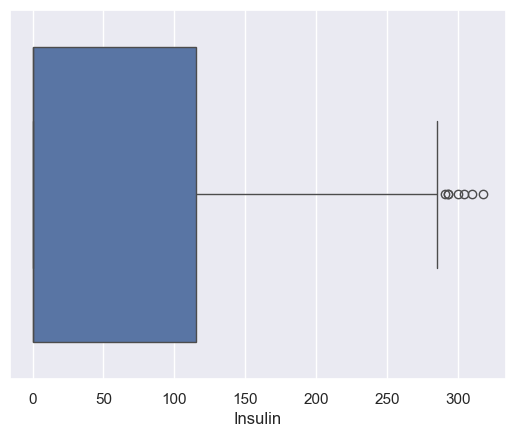

In [36]:
sns.boxplot(x=df['Insulin'])

<Axes: xlabel='DiabetesPedigreeFunction'>

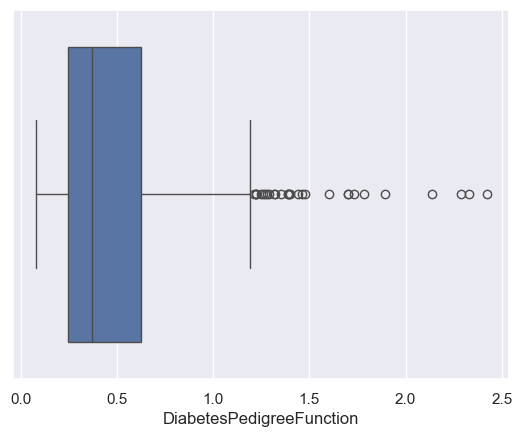

In [32]:
sns.boxplot(x=df['DiabetesPedigreeFunction'])

In [37]:
mn_Q1 = np.percentile(df['DiabetesPedigreeFunction'],25)

mn_Q3 = np.percentile(df['DiabetesPedigreeFunction'],75)


mn_IQR = mn_Q3-mn_Q1
mn_lower_range = mn_Q1 - (1.5*mn_IQR)
mn_upper_range = mn_Q3 + (1.5*mn_IQR)

print(mn_IQR)
print(mn_lower_range)
print(mn_upper_range)

0.37050000000000005
-0.3125000000000001
1.1695000000000002


In [38]:
df = df[(df['DiabetesPedigreeFunction'] > mn_lower_range) & (df['DiabetesPedigreeFunction'] < mn_upper_range)]
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,3.839260,118.477952,68.827881,19.779516,61.512091,31.802276,0.423461,33.136558,0.327169
std,3.362445,30.866993,19.849798,15.933928,78.591171,7.826713,0.243751,11.755273,0.469514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.000000,0.237500,24.000000,0.000000
50%,3.000000,114.000000,72.000000,22.000000,0.000000,32.000000,0.349000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,111.000000,36.300000,0.582500,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,318.000000,67.100000,1.162000,81.000000,1.000000


<Axes: xlabel='DiabetesPedigreeFunction'>

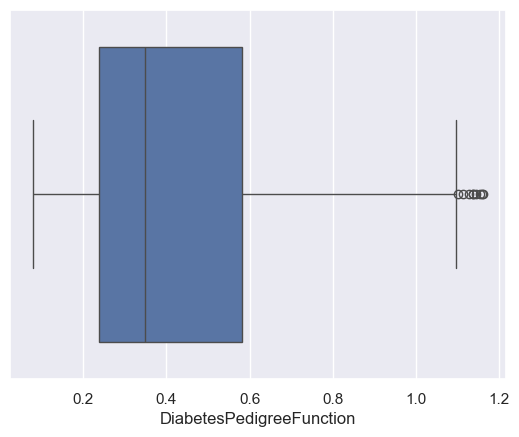

In [39]:
sns.boxplot(x=df['DiabetesPedigreeFunction'])

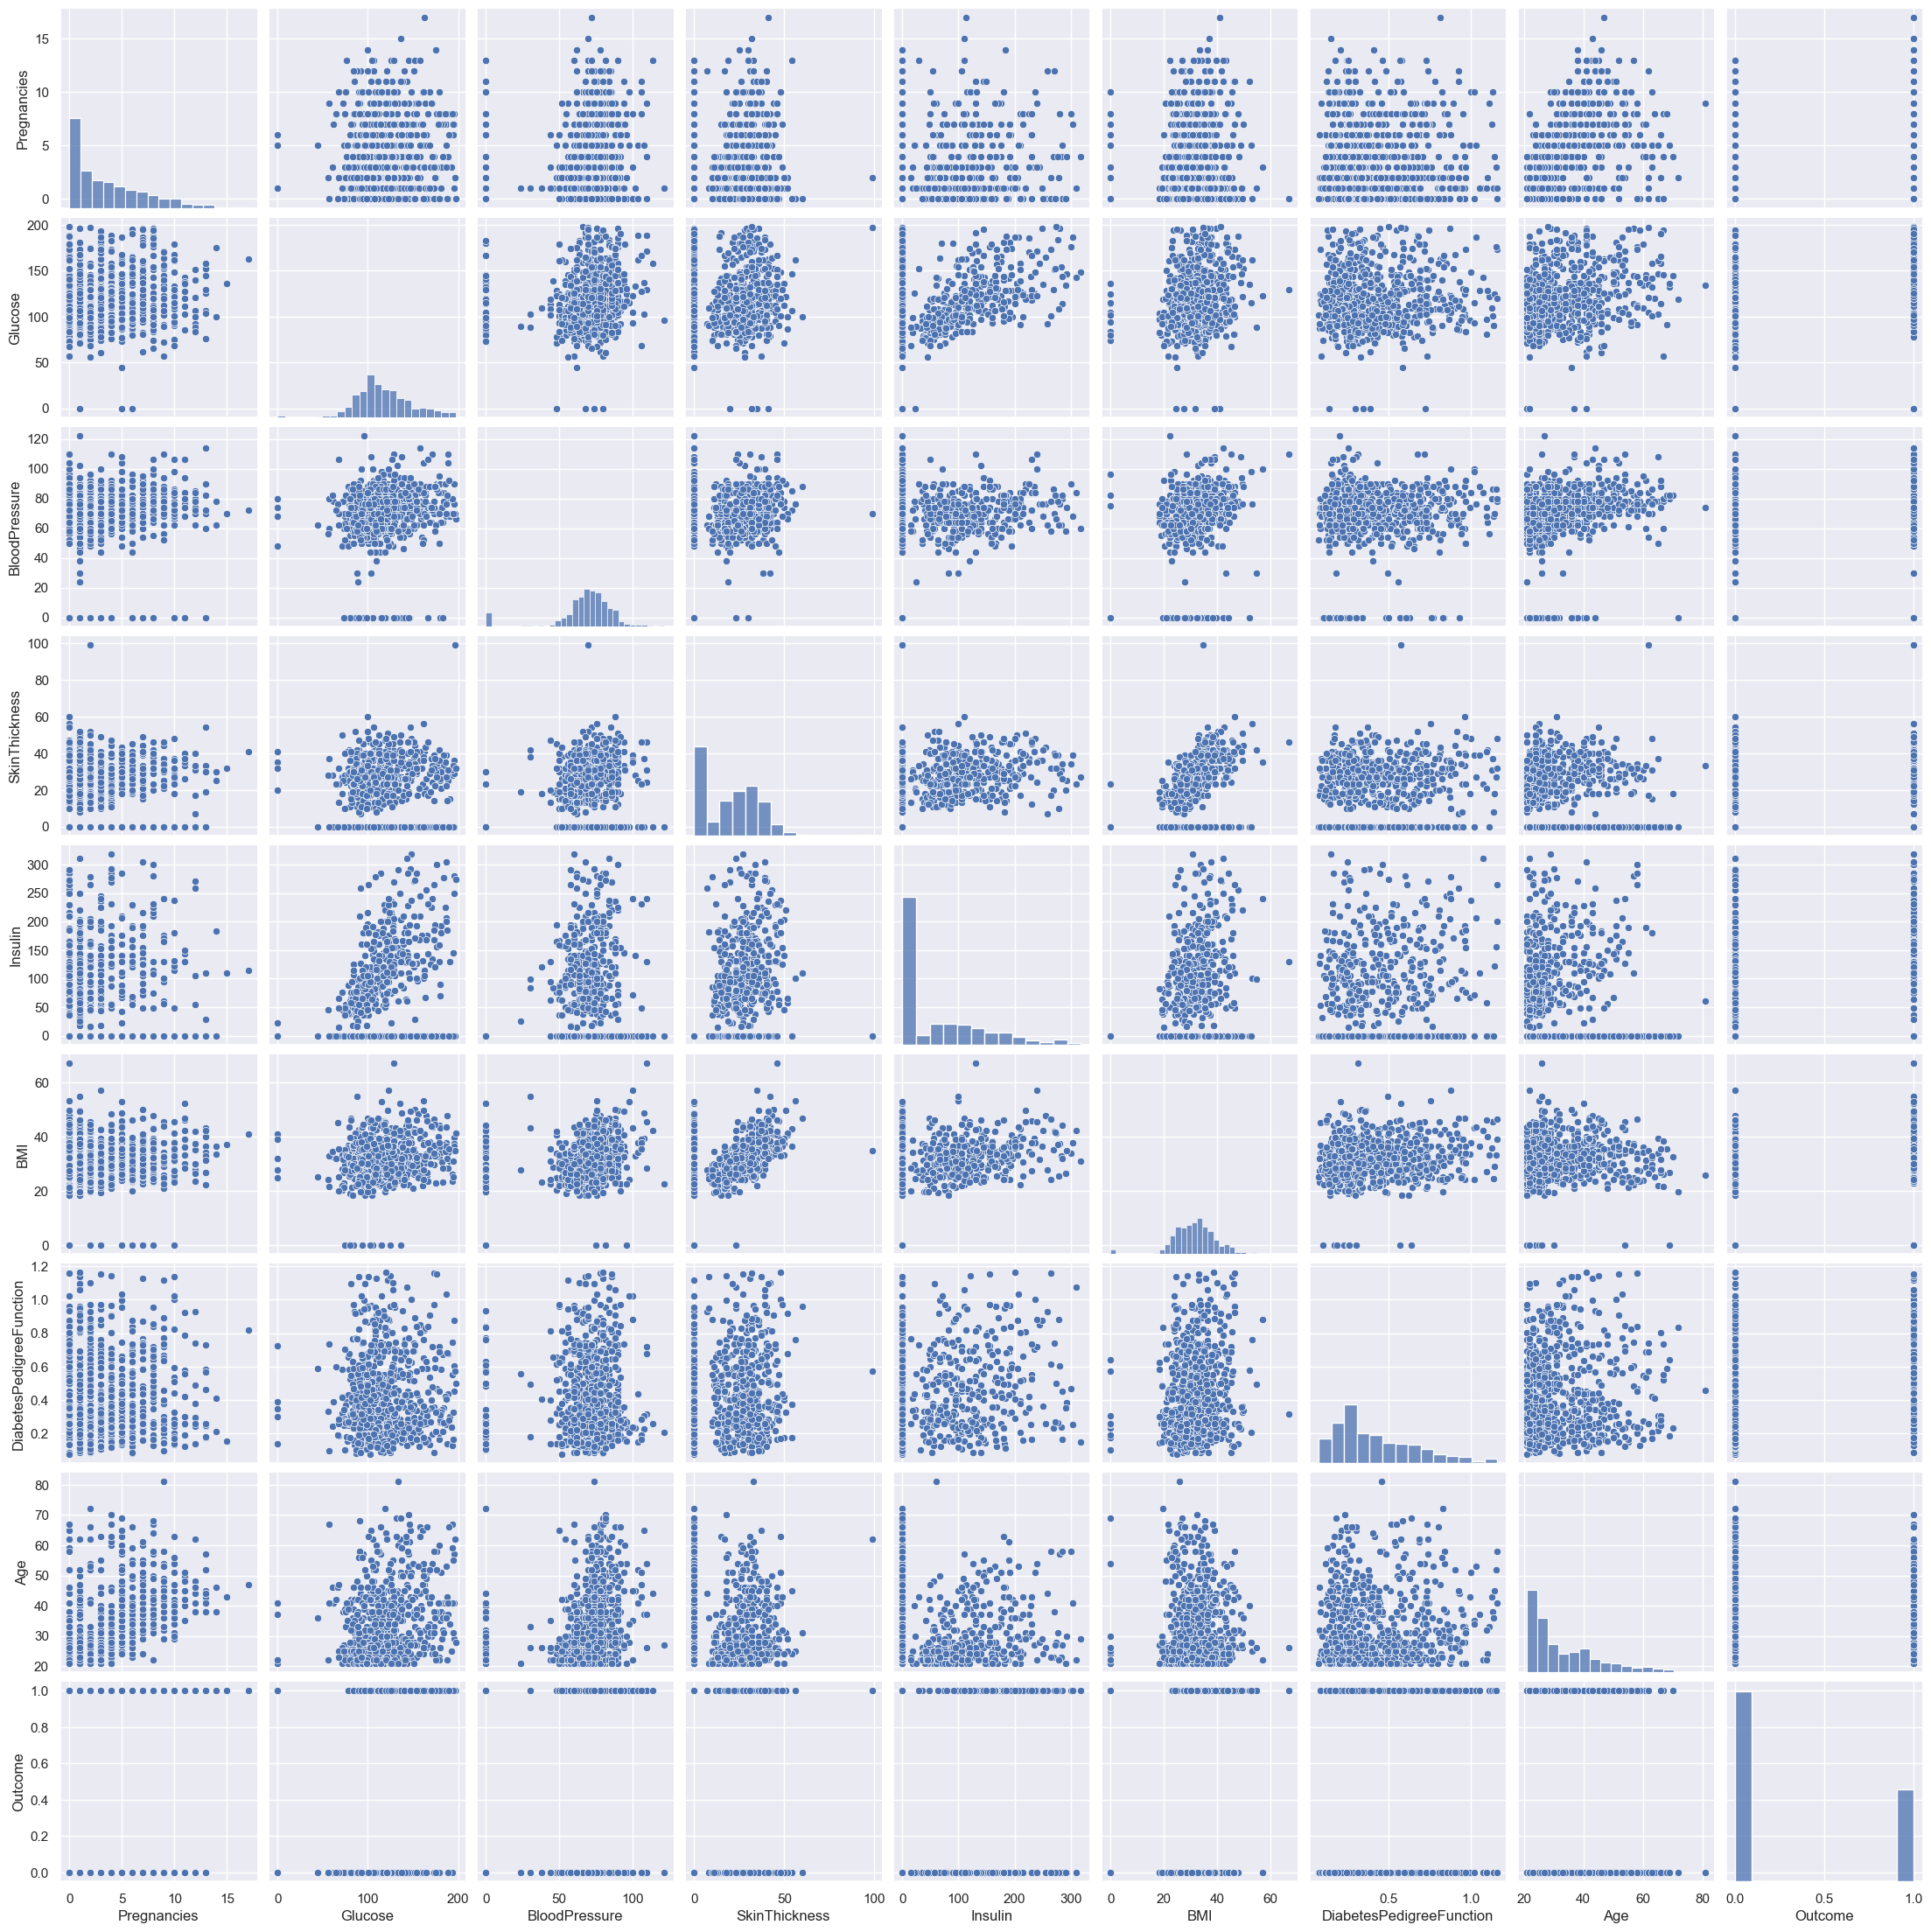

In [41]:
sns.pairplot(df.select_dtypes(include=np.number))

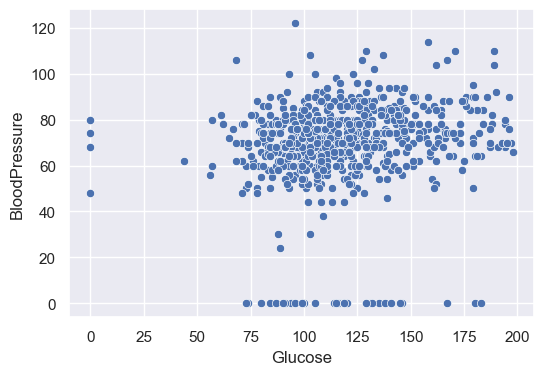

In [56]:
plt.figure(figsize=(6,4))
sns.set_theme(style = 'darkgrid')
sns.scatterplot(data = df, x = 'Glucose', y='BloodPressure')  

plt.show()


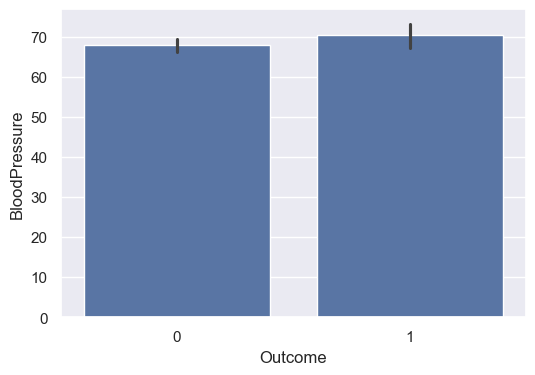

In [59]:
plt.figure(figsize=(6,4))

sns.set_theme(style = 'darkgrid')

sns.barplot(data = df, x = 'Outcome', y='BloodPressure')  

plt.show()


### Data Preprocessing

In [64]:
## df.replace({'Outcome':{'At Risk': 1,'Not at Risk': 0}})

X = df.drop('Outcome',axis= 1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30


In [66]:
y = df['Outcome']
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 703, dtype: int64

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Feature Engineering

In [71]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [73]:
rfe = RFE(estimator = DecisionTreeClassifier(), n_features_to_select= 4)
rfe.fit(X,y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=4)

In [76]:
for i, col in zip(range(X.shape[1]), X.columns):
    print(f"{col} select = {rfe.support_[i]} rank = {rfe.ranking_[i]}")

Pregnancies select = False rank = 3
Glucose select = True rank = 1
BloodPressure select = False rank = 2
SkinThickness select = False rank = 4
Insulin select = False rank = 5
BMI select = True rank = 1
DiabetesPedigreeFunction select = True rank = 1
Age select = True rank = 1


### Model Selection 

### Model Training & Evaluation 

In [87]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled,y_train)
rfc_pred = rfc.predict(X_test_scaled)
rfc_accuracy = accuracy_score(y_test,rfc_pred)
print("Random Forest Accuracy : ",rfc_accuracy)

Random Forest Accuracy :  0.7393364928909952


In [88]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled,y_train)
dtc_pred = dtc.predict(X_test_scaled)
dtc_accuracy = accuracy_score(y_test,dtc_pred)
print(" Decision Tree Accuracy : ",dtc_accuracy)

 Decision Tree Accuracy :  0.7109004739336493


In [80]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test,nb_pred)
print("Naive Bayes Accuracy : ",nb_accuracy)

Naive Bayes Accuracy :  0.7393364928909952


In [81]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
KNN_pred = KNN.predict(X_test)
KNN_accuracy = accuracy_score(y_test,KNN_pred)
print("K Nearest Neighbours Accuracy : ",KNN_accuracy)

K Nearest Neighbours Accuracy :  0.7582938388625592


In [82]:
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_pred)
print("Support Vector Classifier : ",svc_accuracy)

Support Vector Classifier :  0.7725118483412322


In [83]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test,lr_pred)
print("Logistic Regression Accuracy",lr_accuracy)

Logistic Regression Accuracy 0.7725118483412322


In [85]:
X1 = df.drop(['Outcome','Pregnancies','SkinThickness','Insulin'],axis= 1)
X1.head()

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,148,72,33.6,0.627,50
1,85,66,26.6,0.351,31
2,183,64,23.3,0.672,32
3,89,66,28.1,0.167,21
5,116,74,25.6,0.201,30


In [86]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y,test_size = 0.2)

In [89]:
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [90]:
rfc = RandomForestClassifier()
rfc.fit(X1_train_scaled,y1_train)
rfc_pred = rfc.predict(X1_test_scaled)
rfc_accuracy = accuracy_score(y1_test,rfc_pred)
print("Random Forest Accuracy : ",rfc_accuracy)

Random Forest Accuracy :  0.7163120567375887


In [91]:
X1_train_scaled

array([[-0.50617642,  0.28602882, -4.01688752,  0.59443029, -1.01041415],
       [ 0.16990938,  0.13433187,  0.23608082,  1.24812371,  0.08729377],
       [ 0.16990938,  0.94338224,  0.43860313, -0.92814757, -0.33490158],
       ...,
       [-0.44178729,  0.33659447, -1.68788105,  0.63503236, -0.50377973],
       [-0.31300905,  0.53885706, -0.59932367, -0.67641469,  1.60719705],
       [-0.82812203,  0.53885706,  1.3246382 , -0.76573926, -0.33490158]])

In [92]:
X1_test_scaled

array([[ 2.52011237e+00,  1.04451354e+00,  1.02085474e+00,
         1.03145167e-01,  6.78367271e-01],
       [-1.40762414e+00, -8.76981088e-01, -4.98062521e-01,
        -6.35812618e-01, -9.25975081e-01],
       [ 6.85022361e-01,  5.38857057e-01, -1.70720535e-02,
        -2.62273518e-01, -6.72657868e-01],
       [-1.43981870e+00, -9.78112385e-01, -1.10562943e+00,
        -7.21076978e-01, -1.01041415e+00],
       [-2.32579929e-02, -3.50639479e+00,  2.61396112e-01,
         2.05610503e+00,  9.31684484e-01],
       [-1.19841678e-01, -2.70193312e-01, -3.58828438e-01,
        -1.21642231e+00, -7.57096939e-01],
       [ 1.37714815e-01, -8.76981088e-01,  5.65179565e-01,
         1.58512095e+00, -4.19340654e-01],
       [ 4.91854992e-01,  7.41119650e-01,  1.07148532e+00,
         1.09789603e+00,  3.40610986e-01],
       [-1.08567852e+00,  1.34331873e-01, -2.57567287e-01,
        -5.22126805e-01,  1.10056263e+00],
       [-1.69737519e+00,  1.34331873e-01,  3.35585220e-02,
         7.08116101e-01

In [3]:
dataset = pd.read_csv('Diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
## df.replace({'Outcome':{'At Risk': 1,'Not at Risk': 0}})

X = dataset.drop('Outcome',axis= 1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30


In [25]:
y = dataset['Outcome']
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 722, dtype: int64

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size = 0.3, random_state = 4)

In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test_scaled)
rfc_accuracy = accuracy_score(y_test,rfc_pred)
print("Random Forest Accuracy : ",rfc_accuracy)

Random Forest Accuracy :  0.695852534562212


In [60]:
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)
lr_pred = lr.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test,lr_pred)
print("Logistic Regression Accuracy",lr_accuracy)

Logistic Regression Accuracy 0.815668202764977


In [61]:
svc = SVC()
svc.fit(X_train_scaled,y_train)
svc_pred = svc.predict(X_test_scaled)
svc_accuracy = accuracy_score(y_test,svc_pred)
print("Support Vector Classifier : ",svc_accuracy)

Support Vector Classifier :  0.8064516129032258


In [62]:
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled,y_train)
KNN_pred = KNN.predict(X_test_scaled)
KNN_accuracy = accuracy_score(y_test,KNN_pred)
print("K Nearest Neighbours Accuracy : ",KNN_accuracy)

K Nearest Neighbours Accuracy :  0.7972350230414746


In [63]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled,y_train)
dtc_pred = dtc.predict(X_test_scaled)
dtc_accuracy = accuracy_score(y_test,dtc_pred)
print(" Decision Tree Accuracy : ",dtc_accuracy)

 Decision Tree Accuracy :  0.7327188940092166


In [200]:
importance = rfc.feature_importances_

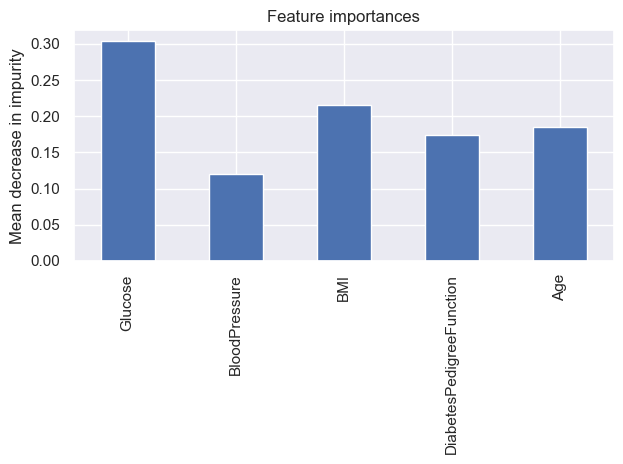

In [201]:
forest_importance = pd.Series(importance, index=X_train.columns)

fig, ax = plt.subplots()
forest_importance.plot.bar()
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: xlabel='Glucose'>

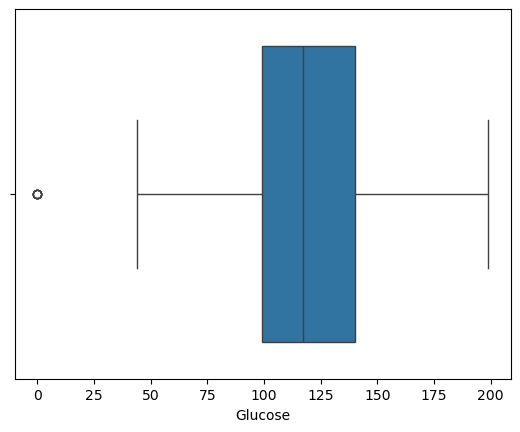

In [7]:
sns.boxplot(x=dataset['Glucose'])

<Axes: xlabel='BloodPressure'>

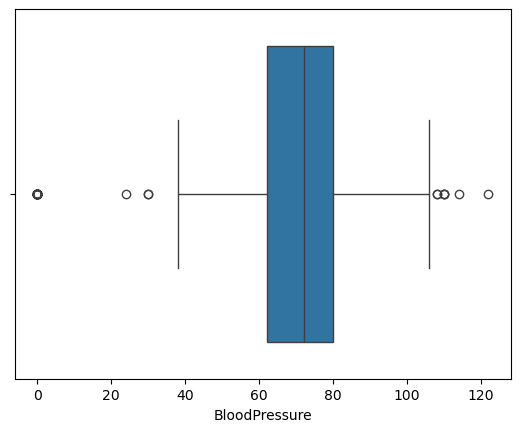

In [9]:
sns.boxplot(x=dataset['BloodPressure'])

<Axes: xlabel='BMI'>

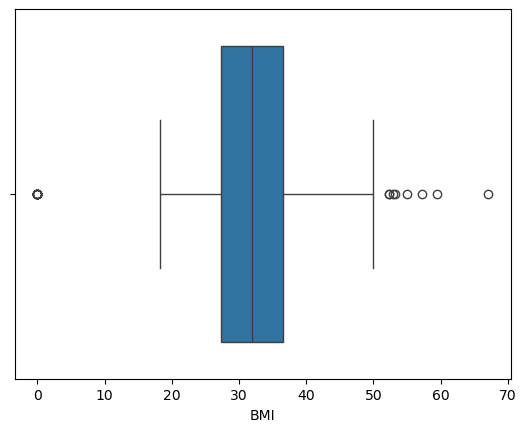

In [10]:
sns.boxplot(x=dataset['BMI'])

In [11]:
mn_Q1 = np.percentile(dataset['BMI'],25)

mn_Q3 = np.percentile(dataset['BMI'],75)


mn_IQR = mn_Q3-mn_Q1
mn_lower_range = mn_Q1 - (1.5*mn_IQR)
mn_upper_range = mn_Q3 + (1.5*mn_IQR)

print(mn_IQR)
print(mn_lower_range)
print(mn_upper_range)

9.3
13.35
50.550000000000004


In [12]:
dataset = dataset[(dataset['BMI'] > mn_lower_range) & (dataset['BMI'] < mn_upper_range)]
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000
mean,3.858478,120.965287,69.658211,20.628838,80.018692,32.204005,0.469355,33.349800,0.347130
std,3.364052,32.056207,18.002395,15.768581,113.974137,6.491385,0.322737,11.728681,0.476375
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,129.000000,36.500000,0.626000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,50.000000,2.329000,81.000000,1.000000


<Axes: xlabel='BMI'>

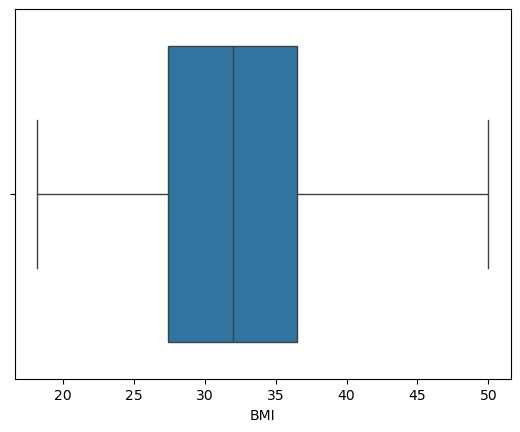

In [13]:
sns.boxplot(x=dataset['BMI'])

<Axes: xlabel='DiabetesPedigreeFunction'>

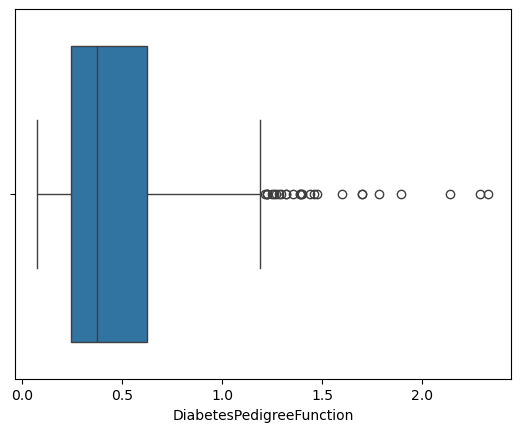

In [14]:
sns.boxplot(x=dataset['DiabetesPedigreeFunction'])

In [15]:
mn_Q1 = np.percentile(dataset['DiabetesPedigreeFunction'],25)

mn_Q3 = np.percentile(dataset['DiabetesPedigreeFunction'],75)


mn_IQR = mn_Q3-mn_Q1
mn_lower_range = mn_Q1 - (1.5*mn_IQR)
mn_upper_range = mn_Q3 + (1.5*mn_IQR)

print(mn_IQR)
print(mn_lower_range)
print(mn_upper_range)

0.382
-0.32899999999999996
1.1989999999999998


In [16]:
dataset = dataset[(dataset['DiabetesPedigreeFunction'] > mn_lower_range) & (dataset['DiabetesPedigreeFunction'] < mn_upper_range)]
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000
mean,3.872576,120.475069,69.569252,20.430748,78.416898,32.151247,0.430669,33.307479,0.337950
std,3.365872,31.732805,18.159451,15.790016,111.160400,6.493986,0.250340,11.761248,0.473339
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.238000,24.000000,0.000000
50%,3.000000,116.500000,72.000000,23.000000,34.000000,32.000000,0.359500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.000000,36.300000,0.587750,41.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,50.000000,1.191000,81.000000,1.000000


<Axes: xlabel='DiabetesPedigreeFunction'>

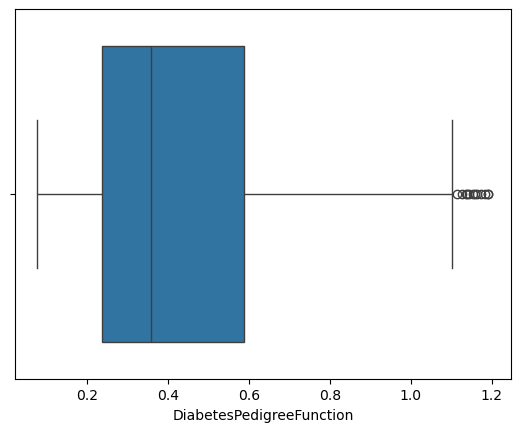

In [17]:
    sns.boxplot(x=dataset['DiabetesPedigreeFunction'])

<Axes: xlabel='Age'>

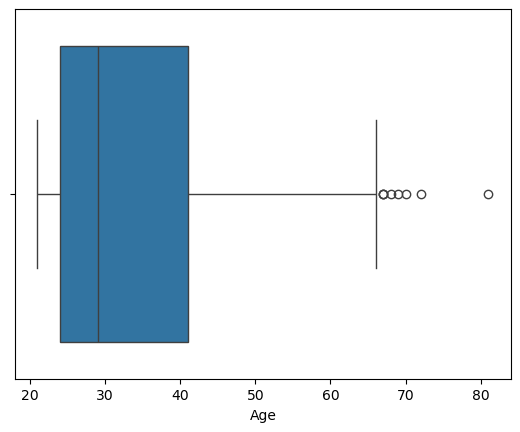

In [19]:
sns.boxplot(x=dataset['Age'])

In [26]:
X1 = dataset.drop(['Outcome','Pregnancies','SkinThickness','Insulin'],axis= 1)
X1.head()

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,148,72,33.6,0.627,50
1,85,66,26.6,0.351,31
2,183,64,23.3,0.672,32
3,89,66,28.1,0.167,21
5,116,74,25.6,0.201,30


In [27]:
X1.shape

(722, 5)

In [28]:
y.shape

(722,)

In [64]:
classifiers = {
    'DecisionTree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'Gaussian Naive Bayes':GaussianNB(),
    'K-Nearest Neighbors':KNeighborsClassifier(),
    'Support Vector classifier':SVC(),
    'Logistic Regression':LogisticRegression()
}

In [75]:
param_grids= {
    'DecisionTree':{'max_depth':[3,4,5,6,7]},
    'Random Forest':{'n_estimators':[50,100,200],'max_depth':[3,4,5,6,7]},
    'Gaussian Naive Bayes':{},
    'K-Nearest Neighbors':{'n_neighbors':[3,5,7]},
    'Support Vector classifier':{'C':[0.1,1.10],'gamma':[0.1,0.01,0.001],'kernel':['rbf']},
    'Logistic Regression':{'C':[0.1,1.10]}
                         
}

In [76]:
results = {}

for name,clf in classifiers.items():
    print(f"Performing GridSearCV for {name}...")
    grid_search = GridSearchCV(clf, param_grid = param_grids[name],cv =7,scoring='accuracy')
    grid_search.fit(X_train,y_train)
    results[name] = {
        'Best Parameters':grid_search.best_params_,
        'Best Score':grid_search.best_score_,
        'Best Classifier':grid_search.best_estimator_
    }

Performing GridSearCV for DecisionTree...
Performing GridSearCV for Random Forest...
Performing GridSearCV for Gaussian Naive Bayes...
Performing GridSearCV for K-Nearest Neighbors...
Performing GridSearCV for Support Vector classifier...
Performing GridSearCV for Logistic Regression...


In [77]:
for name,result in results.items():
    print(f"{name}:")
    print(f"Best Parameters:{result['Best Parameters']}")
    print(f"Best Score:{result['Best Score']}")
    print(f"Best Classifier:{result['Best Classifier']}")
    print("\n")

DecisionTree:
Best Parameters:{'max_depth': 3}
Best Score:0.7366003479017177
Best Classifier:DecisionTreeClassifier(max_depth=3)


Random Forest:
Best Parameters:{'max_depth': 5, 'n_estimators': 50}
Best Score:0.7622580995868666
Best Classifier:RandomForestClassifier(max_depth=5, n_estimators=50)


Gaussian Naive Bayes:
Best Parameters:{}
Best Score:0.7682104805392476
Best Classifier:GaussianNB()


K-Nearest Neighbors:
Best Parameters:{'n_neighbors': 7}
Best Score:0.744564035659926
Best Classifier:KNeighborsClassifier(n_neighbors=7)


Support Vector classifier:
Best Parameters:{'C': 1.1, 'gamma': 0.001, 'kernel': 'rbf'}
Best Score:0.7722330941509024
Best Classifier:SVC(C=1.1, gamma=0.001)


Logistic Regression:
Best Parameters:{'C': 1.1}
Best Score:0.7701946075233747
Best Classifier:LogisticRegression(C=1.1)




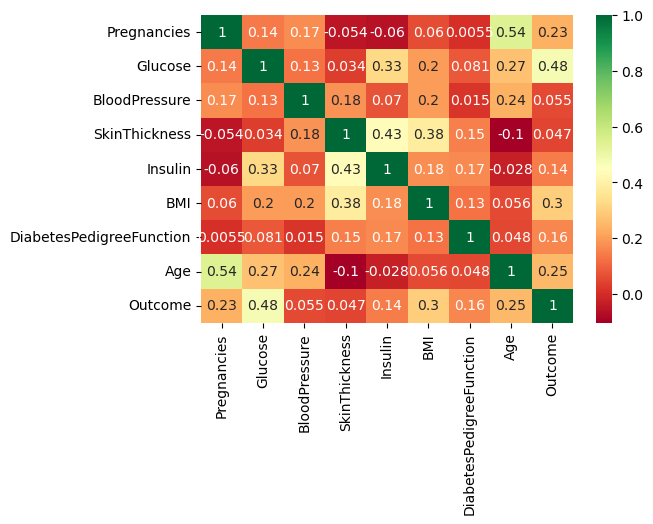

In [79]:
plt.figure(figsize=(6,4)) 
# seaborn has an easy method to showcase heatmap 
p = sns.heatmap(dataset.corr(), annot=True,cmap ='RdYlGn')

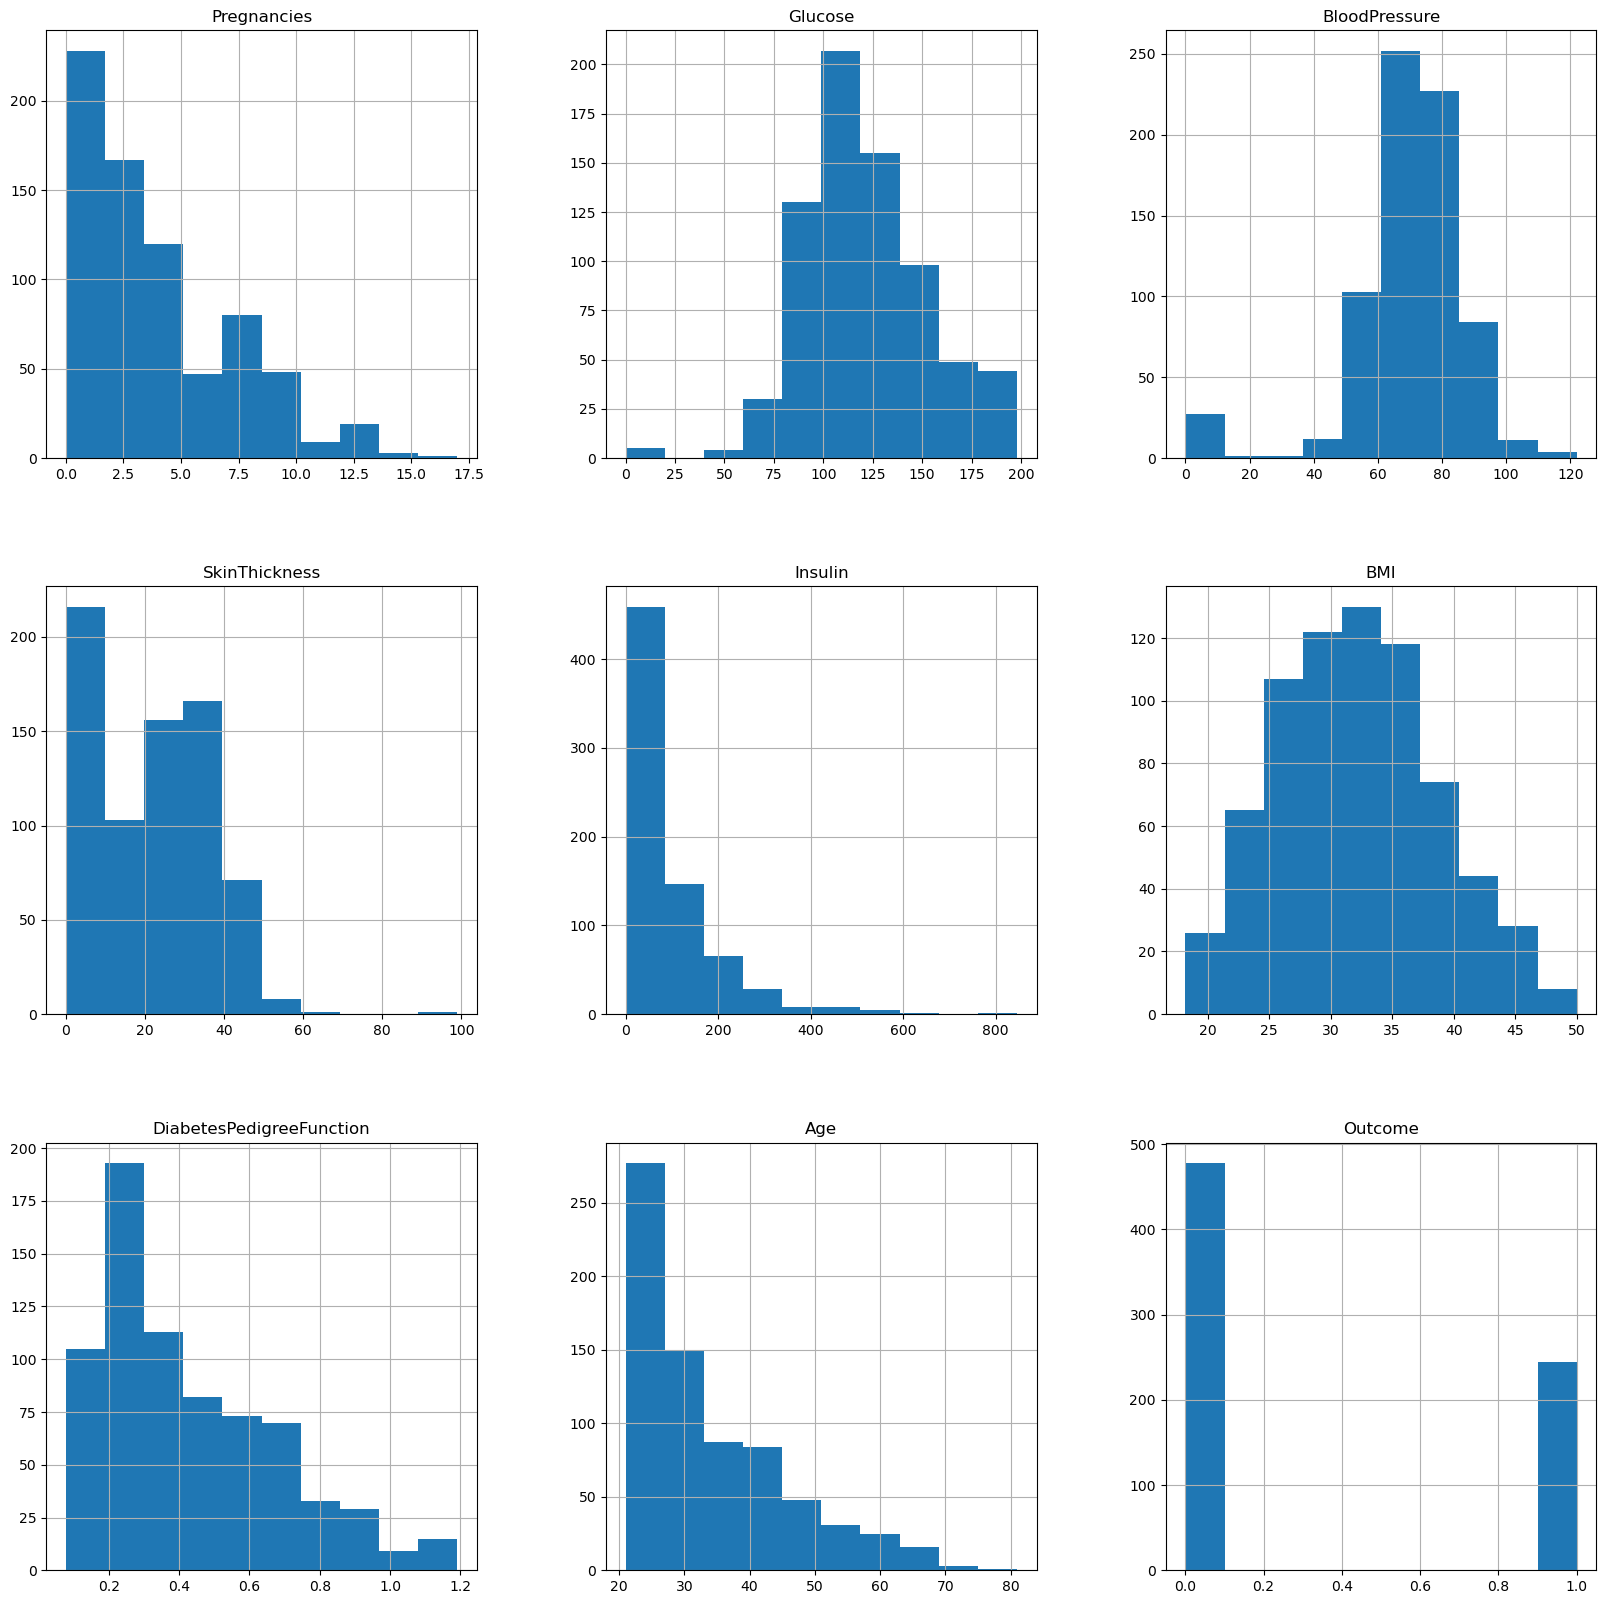

In [78]:
p = dataset.hist(figsize = (20,20))